# BREAST CANCER CLASSIFICATION
PROBLEM STATEMENT
Predict if a cancer diagonsis is malignant or benign by classifying several features and observation.

Data Set Characteristics:

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)
   class:
            - WDBC-Malignant
            - WDBC-Benign

# Importing important libraries 

In [4]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df1.columns = [*df1.columns[:-1], 'Target']
df1=df1.drop(['Target'],axis=1)
df1.head()

**Visualization of Dataset**

**1.Pairplot**

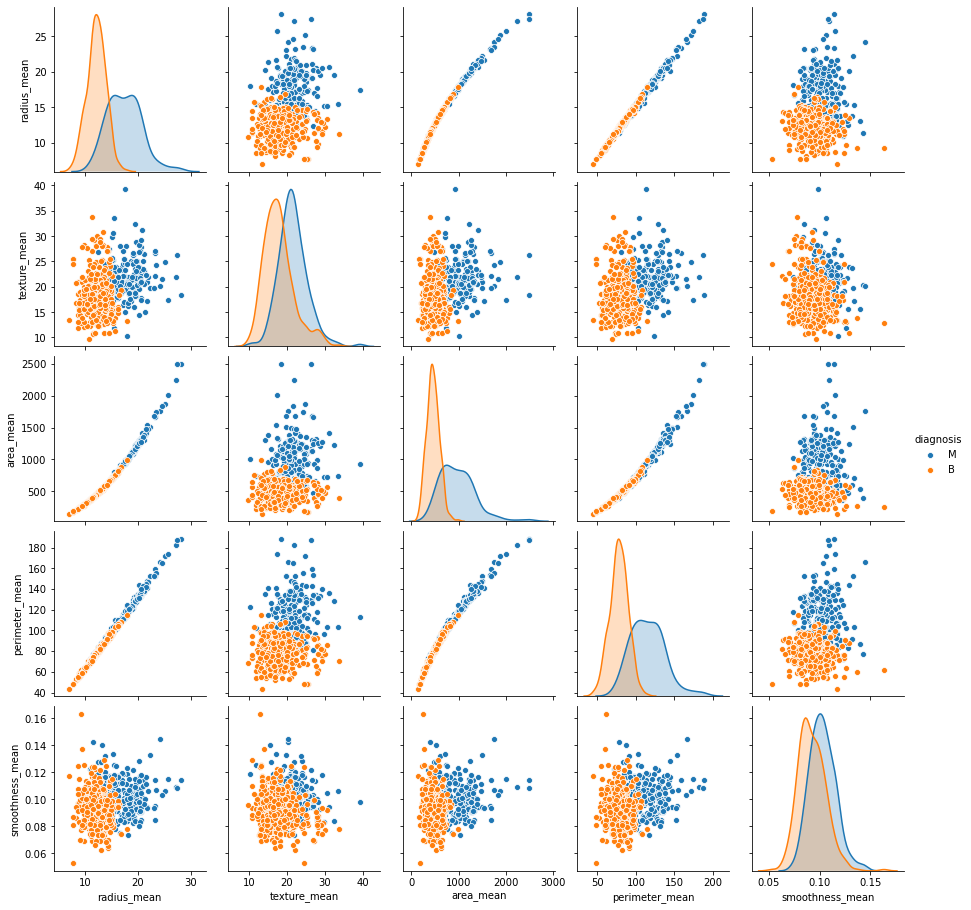

In [7]:
sns.pairplot(df1, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

**2.Histogram**

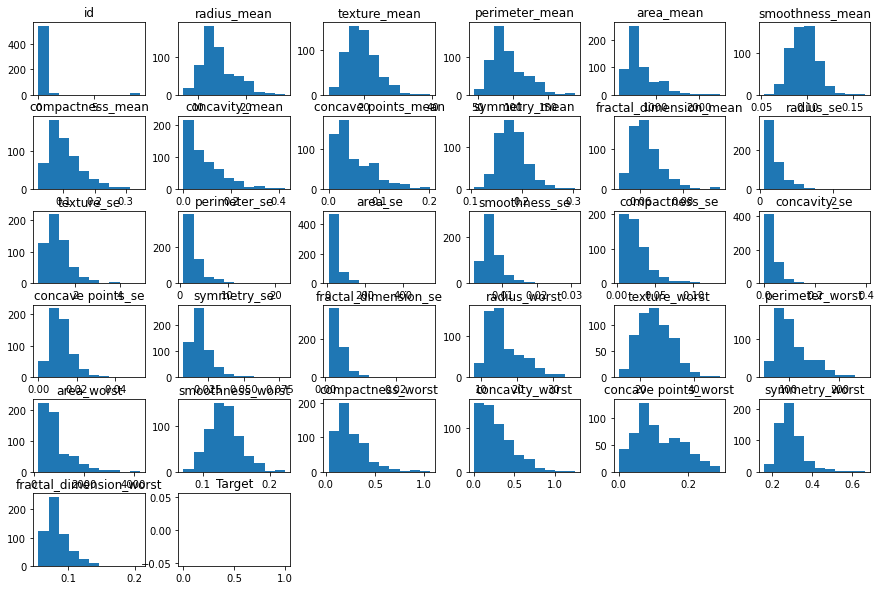

In [8]:
hist_mean=df1.hist(bins=10, figsize=(15, 10),grid=False,)

**3.Count Plot**

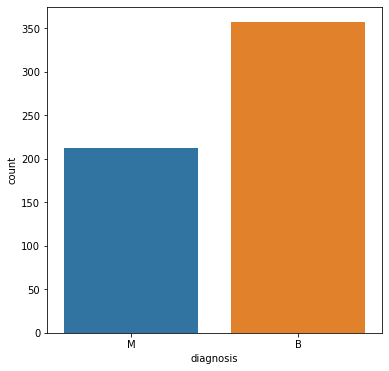

In [9]:
plt.figure (figsize=(6,6))
p = sns.countplot(data=df1,x = 'diagnosis',)

**4.Scatter Plot**

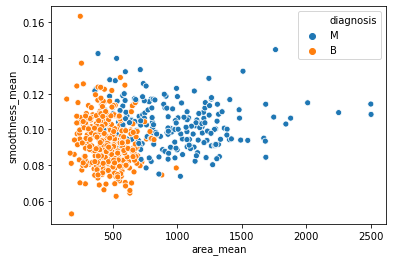

In [10]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = df1)

**5.Heatmap**

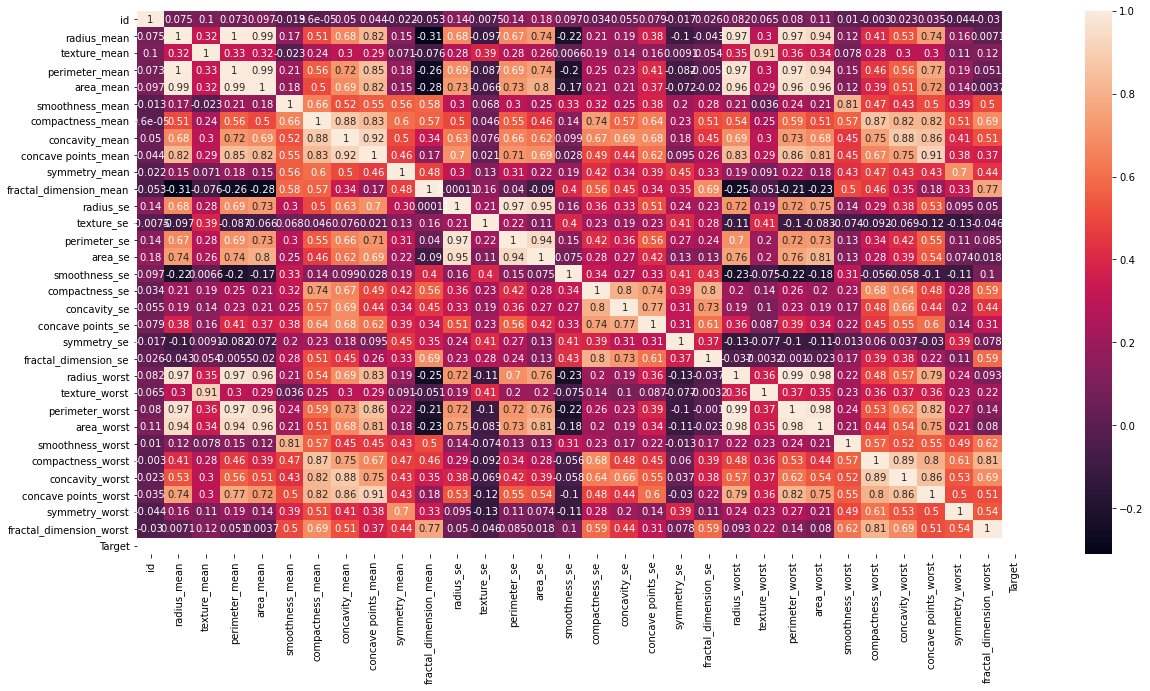

In [11]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df1.corr(), annot=True)

# MODEL TRAINING

In [12]:
X = df1.drop(['diagnosis'], axis=1)
y = df1['diagnosis']

In [13]:
# split data into training and testing with a ratio of 80:20 using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

# Evaluating model

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

**1.SVM**

In [15]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)
accuracy1=svc_model.score(X_test,y_test)
print (accuracy1*100,'%')
print(classification_report(y_test, y_predict))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**2.Logistic Regression**

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
accuracy1=logistic.score(X_test,y_test)
print (accuracy1*100,'%')
print(classification_report(y_test,y_pred))

**3.Random Forest Classifier**

In [ ]:
des_class=DecisionTreeClassifier()
des_class.fit(X_train,y_train)
des_predict=des_class.predict(X_test)
cm=confusion_matrix(y_test,des_predict)
print(classification_report(y_test,des_predict))
accuracy3=des_class.score(X_test,y_test)
print(accuracy3*100,'%')
sns.heatmap(cm,annot=True)

**4.KNN**

In [ ]:
model= KNeighborsClassifier()
model.fit(X_train,y_train)
model_predict=model.predict(X_test)
print(classification_report(y_test,model_predict))
accuracy4=model.score(X_test,y_test)
print(accuracy4*100,'%')
cm=confusion_matrix(y_test,model_predict)
sns.heatmap(cm,annot=True)